In [75]:
#models for predicting game outcomes at 15 minutes;
# Dependencies;
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [76]:
# Store filepath in a variable
path = "machine_learning_data.csv"

In [77]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
master_df = pd.read_csv(path, encoding="ISO-8859-1")

In [185]:
master_df.columns

master_df.head()

,gameid,league,playerid,gamelength,team,teamkills,teamdeaths,a,fb,fbtime,...,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,blue_result
0,980560,LEC,100,30.816667,Fnatic,12.0,11.0,26.0,0,5.372200,...,18459.0,19689.0,-1230.0,334.0,350.0,-16.0,554.0,562.0,-8.0,0
1,980572,LEC,100,38.166667,Splyce,16.0,6.0,43.0,1,6.991083,...,17729.0,18782.0,-1053.0,302.0,292.0,10.0,476.0,489.0,-13.0,1
2,980590,LEC,100,31.600000,Vitality,8.0,12.0,16.0,0,4.062067,...,19198.0,19628.0,-430.0,326.0,332.0,-6.0,530.0,529.0,1.0,0
3,990708,LEC,100,24.550000,Rogue,3.0,12.0,6.0,0,2.490617,...,18476.0,18799.0,-323.0,329.0,316.0,13.0,497.0,490.0,7.0,0
4,990721,LEC,100,27.233333,Origen,5.0,19.0,6.0,1,8.510200,...,19635.0,19598.0,37.0,344.0,339.0,5.0,524.0,537.0,-13.0,0


In [186]:
master_df.replace('blue loss', 0, inplace=True)
master_df.replace('blue win', 1, inplace=True)

master_df.columns

Index(['gameid', 'league', 'playerid', 'gamelength', 'team', 'teamkills',
       'teamdeaths', 'a', 'fb', 'fbtime', 'teamdragkills', 'oppdragkills',
       'elders', 'oppelders', 'herald', 'heraldtime', 'ft', 'fttime',
       'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'wards', 'wpm',
       'wardshare', 'wardkills', 'wcpm', 'visionwards', 'totalgold',
       'minionkills', 'monsterkills', 'monsterkillsownjungle',
       'monsterkillsenemyjungle', 'cspm', 'goldat10', 'oppgoldat10', 'gdat10',
       'goldat15', 'oppgoldat15', 'gdat15', 'xpat10', 'oppxpat10', 'xpdat10',
       'csat10', 'oppcsat10', 'csdat10', 'csat15', 'oppcsat15', 'csdat15',
       'blue_result'],
      dtype='object')

In [231]:
X = master_df.drop(['gameid', 'league', 'blue_result', 'playerid', 'team', 'totalgold', 'goldat10',
                   'oppgoldat10', 'gdat10', 'xpat10', 'oppxpat10', 'xpdat10', 'csat10', 'oppcsat10',
                   'csdat10', 'teamkills', 'teamdeaths', 'a', 'fbaron', 'fbarontime',
                   'teambaronkills', 'oppbaronkills', 'dmgtochamps', 'gamelength',
                   'firstmidouter', 'firsttothreetowers', 'teamtowerkills', 'opptowerkills', 'wards'], axis=1)
y = master_df['blue_result'].values.reshape(-1, 1)

class_names = master_df.blue_result

X.columns

Index(['fb', 'fbtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders',
       'herald', 'heraldtime', 'ft', 'fttime', 'dmgtochampsperminute', 'wpm',
       'wardshare', 'wardkills', 'wcpm', 'visionwards', 'minionkills',
       'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle',
       'cspm', 'goldat15', 'oppgoldat15', 'gdat15', 'csat15', 'oppcsat15',
       'csdat15'],
      dtype='object')

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [233]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [234]:
y_pred = model.fit(X_train, y_train).predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [235]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8586171310629515
Testing Data Score: 0.8412371134020619


In [236]:
predictions = model.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 0 1 1 0 0]
First 10 Actual labels: [[0], [0], [0], [1], [0], [0], [1], [0], [0], [0]]


In [237]:
#goto make this a chart

In [238]:
model.score(X_test, y_test)

0.8412371134020619

In [239]:
from sklearn.metrics import confusion_matrix

In [240]:
confusion_matrix(y_test, model.predict(X_test))

array([[354,  81],
       [ 73, 462]])

In [241]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[354  81]
 [ 73 462]]
Normalized confusion matrix
[[0.81 0.19]
 [0.14 0.86]]


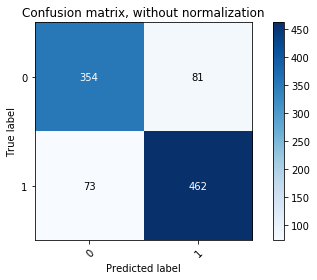

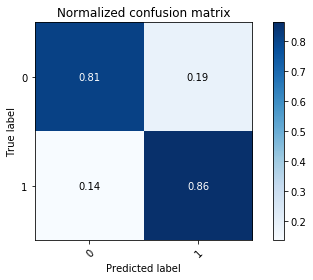

In [242]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [199]:
### test real games 

# Store filepath in a variable
match_path = "2019_matchups.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
matchups_df = pd.read_csv(match_path, encoding="ISO-8859-1")

matchups_df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1163171,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43674.656782,8.0,2,9.14,100,Blue,...,1186,18601,18413,188,277,310,-33,485,503,-18
1,1163171,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43674.656782,8.0,2,9.14,100,Blue,...,1186,18601,18413,188,277,310,-33,485,503,-18
2,990452,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2019-2,43673.526528,6.0,2,9.14,100,Blue,...,3980,17710,17809,-99,294,297,-3,485,459,26
3,1162715,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43673.643657,8.0,1,9.14,100,Blue,...,-960,18533,18376,157,326,307,19,496,494,2
4,990415,http://matchhistory.na.leagueoflegends.com/en/...,LEC,2019-2,43673.444271,6.0,2,9.14,100,Blue,...,852,18273,18070,203,273,292,-19,405,460,-55


In [200]:
matchups_df['blue_result'] = matchups_df.side.astype(str).str.cat(matchups_df.result.astype(str), sep=" , ")

In [201]:
matchups_df.replace('Blue , 0', 'blue loss', inplace=True)
matchups_df.replace('Blue , 1', 'blue win', inplace=True)
matchups_df.replace('Red , 1', 'blue loss', inplace=True)
matchups_df.replace('Red , 0', 'blue win', inplace=True)

matchups_df.replace('blue loss', 0, inplace=True)
matchups_df.replace('blue win', 1, inplace=True)

In [228]:
real_X = matchups_df[['fb', 'fbtime', 'teamdragkills', 'oppdragkills', 'elders', 'oppelders',
       'herald', 'heraldtime', 'ft', 'fttime', 'dmgtochampsperminute', 'wpm',
       'wardshare', 'wardkills', 'wcpm', 'visionwards', 'minionkills',
       'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle',
       'cspm', 'goldat15', 'oppgoldat15', 'gdat15', 'csat15', 'oppcsat15',
       'csdat15']]

real_X

,fb,fbtime,teamdragkills,oppdragkills,elders,oppelders,herald,heraldtime,ft,fttime,...,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat15,oppgoldat15,gdat15,csat15,oppcsat15,csdat15
0,1,4.140817,2,2,0,0,0,13.267633,0,17.657450,...,187,109,18,30.471204,25758,24572,1186,485,503,-18
1,1,4.140817,2,2,0,0,0,13.267633,0,17.657450,...,187,109,18,30.471204,25758,24572,1186,485,503,-18
2,0,5.323533,1,1,0,0,1,15.628200,1,15.043283,...,141,88,18,31.572581,26042,22062,3980,485,459,26
3,0,9.092283,2,2,0,0,1,10.953667,1,11.451450,...,207,136,16,32.788650,25383,26343,-960,496,494,2
4,0,3.578733,3,0,0,0,1,15.163200,0,14.902533,...,172,84,27,30.917176,24543,23691,852,405,460,-55
5,0,12.449750,2,2,0,0,1,12.596333,1,16.820567,...,218,146,13,41.264940,24635,24927,-292,603,582,21
6,0,7.510000,1,4,0,0,0,12.137650,0,15.144700,...,168,140,0,32.946429,23244,24803,-1559,531,544,-13
7,0,3.306383,4,3,0,1,0,12.669733,0,15.343683,...,274,168,45,29.014396,24051,26544,-2493,538,532,6
8,0,4.588267,3,1,0,0,1,13.618450,1,14.923367,...,190,105,19,34.809689,25080,24976,104,531,475,56
9,0,9.092283,2,2,0,0,1,10.953667,1,11.451450,...,207,136,16,32.788650,25383,26343,-960,496,494,2


In [229]:
teams = matchups_df['team']

real_result = matchups_df['result']

predicted_result = model.predict(real_X)

results_dict = {
    "blue team": teams,
    "real result": real_result, 
    "predicted result": predicted_result
}

results_df = pd.DataFrame(results_dict)


In [230]:
results_df

,blue team,real result,predicted result
0,Cloud9,1,1
1,Cloud9,1,1
2,G2 Esports,1,1
3,Team Liquid,1,1
4,Excel Esports,1,1
5,Griffin,0,1
6,KT Rolster,0,0
7,Team SoloMid,1,0
8,Golden Guardians,1,1
9,Team Liquid,1,1
